# Sources Factory

The sources factory tool is used to generate pandas dataframes with coordinates of particles.
They may be used in building particles positions files which are needed for openfoam LSM simulations.

For all models, one must deliver the x, y and z coordinates of the middle of the source, and the number of particles.
Each type of source may require other additional parameters.

A list of all available sources types can be viewed this way:

In [2]:
from hera.simulations.openfoam.lsm.sourcesFactory import sourcesFactory

sources = sourcesFactory()
sources.sourcesList

['Point', 'Circle', 'Sphere', 'Cylinder', 'Rectangle', 'HyperRectangle']

Sources are made using the next function:

In [3]:
x = 1 # x coordinate
y = 2 # y coordinate
z = 3 # z coordinate
nParticles = 5 # number of particles
sources.getSource(x = x, y = y, z = z, nParticles = nParticles)

,x,y,z
0,1,2,3
1,1,2,3
2,1,2,3
3,1,2,3
4,1,2,3


Now we will explore the available sources as of today:

## Point

Puts all particles at the same point; it requires no additional parameters.

## Circle

Distibutes the particles in a horizontal circle.
Requries radius, and distribution type, which is optional.
The default distribution type is "uniform". 
Additional types are "normal" and "lognormal".
For these types, the radius is the sigma of the gaussian.
For example:

Text(0.5, 1.0, 'normal')

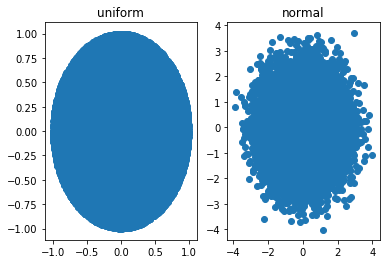

In [4]:
import matplotlib.pyplot as plt

x = 0 # x coordinate
y = 0 # y coordinate
radius = 1
nParticles = 100000
uniform = sources.getSource(x = x, y = y, z = z, nParticles = nParticles, type = "Circle", radius = radius, distribution = "uniform")
normal = sources.getSource(x = x, y = y, z = z, nParticles = nParticles, type = "Circle", radius = radius, distribution = "normal")

fig, axs = plt.subplots(1,2)
axs[0].scatter(uniform.x,uniform.y)
axs[0].set_title("uniform")
axs[1].scatter(normal.x,normal.y)
axs[1].set_title("normal")

## Sphere

Distibutes the particles in a sphere around the inserted coordinates.
Requries radius, and distribution type, which is optional.
The default distribution type is "uniform". 
Additional types are "normal" and "lognormal".
For these types, the radius is the sigma of the gaussian.

Text(0.5, 1.0, 'vertical slice')

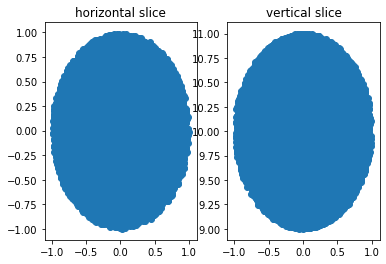

In [5]:
x = 0 # x coordinate
y = 0 # y coordinate
z = 10 # z coordinate
radius = 1
nParticles = 100000
uniform = sources.getSource(x = x, y = y, z = z, nParticles = nParticles, type = "Sphere", radius = radius, distribution = "uniform")

fig, axs = plt.subplots(1,2)
axs[0].scatter(uniform.x,uniform.y)
axs[0].set_title("horizontal slice")
axs[1].scatter(uniform.x,uniform.z)
axs[1].set_title("vertical slice")

## Cylinder

Distibutes the particles in a cylinder around the inserted coordinates.
Requries radius, height, and horizontal and vertical distribution types, which are optional.
The default distribution type is "uniform". 
Additional types are "normal" and "lognormal".
For these types, the radius or height is the sigma of the gaussian.

Text(0.5, 1.0, 'vertical slice')

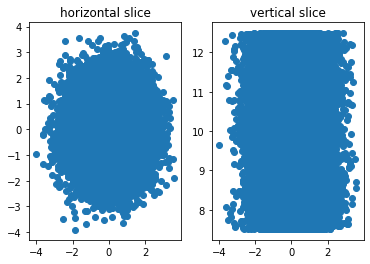

In [6]:
x = 0 # x coordinate
y = 0 # y coordinate
z = 10 # z coordinate
radius = 1
height = 5
nParticles = 100000
cylinder = sources.getSource(x = x, y = y, z = z, nParticles = nParticles, type = "Cylinder", height = height,
                            radius = radius, horizontalDistribution = "normal", verticalDistribution = "uniform")

fig, axs = plt.subplots(1,2)
axs[0].scatter(cylinder.x,cylinder.y)
axs[0].set_title("horizontal slice")
axs[1].scatter(cylinder.x,cylinder.z)
axs[1].set_title("vertical slice")

## Rectangle

Distibutes the particles in a horizontal recatngle whose middle point is the inserted coordinates.
Requries lengthX and lengthY, which are length in two perpendicular directions.
An optional parameter is rotateAngle, which is used in order to rotate the source in the xy plane.

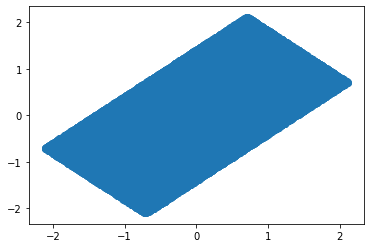

In [7]:
import numpy

lengthX = 2
lengthY = 4
rotateAngle = numpy.pi/4
rectangle = sources.getSource(x = x, y = y, z = z, nParticles = nParticles, type = "Rectangle", lengthX = lengthX, lengthY = lengthY, rotateAngle = rotateAngle)
plt.scatter(rectangle.x,rectangle.y)

## hyperrectangle

Distibutes the particles in a three dimensional whose middle point is the inserted coordinates.
Requries lengthX, lengthZ and lengthZ, which are length in three perpendicular directions.
An optional parameter is rotateAngle, which is used in order to rotate the source in the xy plane.

Text(0.5, 1.0, 'vertical slice')

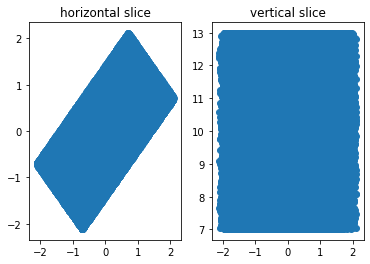

In [8]:
lengthX = 2
lengthY = 4
lengthZ = 6
rotateAngle = numpy.pi/4
hyperRectangle = sources.getSource(x = x, y = y, z = z, nParticles = nParticles, type = "HyperRectangle",
                                   lengthX = lengthX, lengthY = lengthY, lengthZ = lengthZ, rotateAngle = rotateAngle)
fig, axs = plt.subplots(1,2)
axs[0].scatter(hyperRectangle.x,hyperRectangle.y)
axs[0].set_title("horizontal slice")
axs[1].scatter(hyperRectangle.x,hyperRectangle.z)
axs[1].set_title("vertical slice")